In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Открываем файл с данными и делим их на TEST и TRAIN части

In [2]:
data = pd.read_csv('Data.txt', sep=';', )

In [20]:
data

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96600,TRAIN,96601,3,3,1,55,6,Москва,38,6,...,N,1,1,0,0.0,0,0,0.0,Московская,-0.14
96601,TRAIN,96602,4,3,1,50,5,Санкт-Петербург,30,6,...,0,1,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
96602,TRAIN,96603,3,3,1,50,5,Москва,59,31,...,0,1,1,0,3.0,0,2,0.0,Москва,-0.22
96603,TRAIN,96604,3,3,1,52,6,Москва,41,19,...,0,0,1,0,0.0,0,1,0.0,Московская,0.04


In [21]:
data_train = data[data['DATA_TYPE'].isin(['TRAIN'])]

In [22]:
data_train

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96600,TRAIN,96601,3,3,1,55,6,Москва,38,6,...,N,1,1,0,0.0,0,0,0.0,Московская,-0.14
96601,TRAIN,96602,4,3,1,50,5,Санкт-Петербург,30,6,...,0,1,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
96602,TRAIN,96603,3,3,1,50,5,Москва,59,31,...,0,1,1,0,3.0,0,2,0.0,Москва,-0.22
96603,TRAIN,96604,3,3,1,52,6,Москва,41,19,...,0,0,1,0,0.0,0,1,0.0,Московская,0.04


In [23]:
data_test = data[data['DATA_TYPE'].isin(['TEST '])]

# Смотрим информацию о данных и задаём настройки визуализации

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA_TYPE                      96605 non-null  object 
 1   POLICY_ID                      96605 non-null  int64  
 2   POLICY_BEGIN_MONTH             96605 non-null  int64  
 3   POLICY_END_MONTH               96605 non-null  int64  
 4   POLICY_IS_RENEWED              96605 non-null  int64  
 5   POLICY_SALES_CHANNEL           96605 non-null  int64  
 6   POLICY_SALES_CHANNEL_GROUP     96605 non-null  int64  
 7   POLICY_BRANCH                  96605 non-null  object 
 8   POLICY_MIN_AGE                 96605 non-null  int64  
 9   POLICY_MIN_DRIVING_EXPERIENCE  96605 non-null  int64  
 10  VEHICLE_MAKE                   96605 non-null  object 
 11  VEHICLE_MODEL                  96605 non-null  object 
 12  VEHICLE_ENGINE_POWER           96605 non-null 

In [25]:
data_train.nunique()

DATA_TYPE                            1
POLICY_ID                        77407
POLICY_BEGIN_MONTH                  12
POLICY_END_MONTH                    12
POLICY_IS_RENEWED                    2
POLICY_SALES_CHANNEL                63
POLICY_SALES_CHANNEL_GROUP           8
POLICY_BRANCH                        2
POLICY_MIN_AGE                      68
POLICY_MIN_DRIVING_EXPERIENCE      110
VEHICLE_MAKE                        80
VEHICLE_MODEL                      525
VEHICLE_ENGINE_POWER               337
VEHICLE_IN_CREDIT                    2
VEHICLE_SUM_INSURED              37525
POLICY_INTERMEDIARY               1333
INSURER_GENDER                       2
POLICY_CLM_N                         7
POLICY_CLM_GLT_N                     7
POLICY_PRV_CLM_N                     7
POLICY_PRV_CLM_GLT_N                 7
CLIENT_HAS_DAGO                      2
CLIENT_HAS_OSAGO                     2
POLICY_COURT_SIGN                    2
CLAIM_AVG_ACC_ST_PRD               672
POLICY_HAS_COMPLAINTS    

In [26]:
# Setting up visualisations
import seaborn as sns
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

# Поиск взаимосвязей

Text(0.5, 1.0, 'Колличество пролонгированых клиентов')

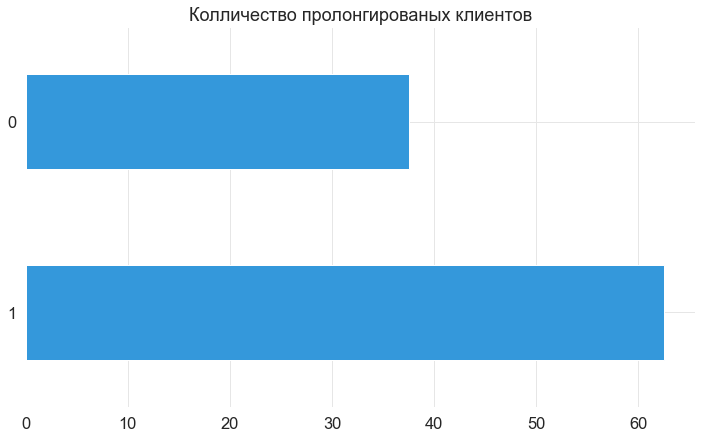

In [27]:
(data_train.POLICY_IS_RENEWED.value_counts(normalize=True) * 100).plot.barh().set_title("Колличество пролонгированых клиентов")


<AxesSubplot:>

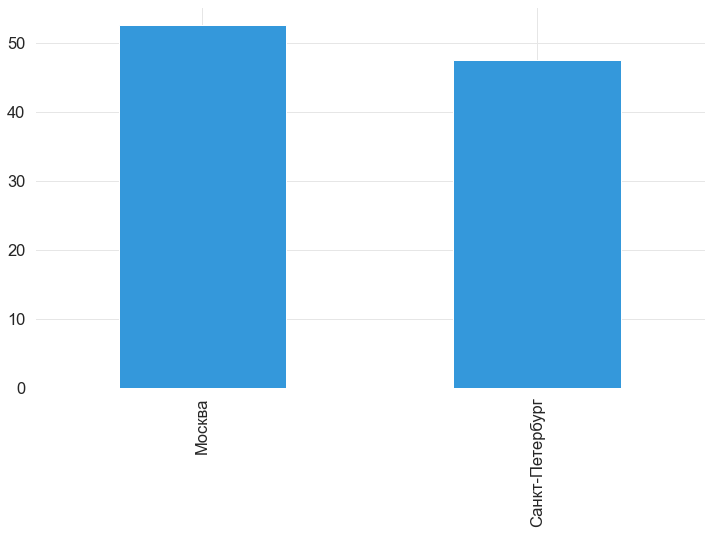

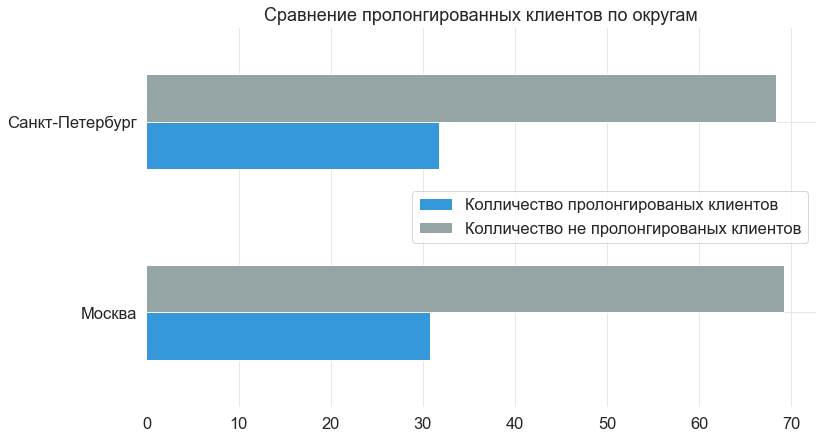

In [28]:
fig_branch = (data_train.POLICY_BRANCH.value_counts(normalize = True) * 100).plot.bar()
center_pr = round((data_train[data_train.POLICY_BRANCH == 'Москва'].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train.POLICY_BRANCH) * 100, 2)
Piter_pr = round((data_train[data_train.POLICY_BRANCH == 'Санкт-Петербург'].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train.POLICY_BRANCH) * 100, 2)
Okrug_perc_df = pd.DataFrame(
    { "Колличество пролонгированых клиентов":{"Москва": center_pr,"Санкт-Петербург": Piter_pr},  "Колличество не пролонгированых клиентов":{"Москва": 100-center_pr,"Санкт-Петербург": 100-Piter_pr}})
Okrug_perc_df.plot.barh().set_title("Сравнение пролонгированных клиентов по округам")
fig_branch

In [29]:
pd.DataFrame(data_train.POLICY_MIN_AGE.describe())


,POLICY_MIN_AGE
count,77407.000000
mean,42.627359
std,10.715267
min,18.000000
25%,34.000000
50%,41.000000
75%,50.000000
max,86.000000


<ipython-input-30-e8aa0a5a1399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['POLICY_AGE'] = pd.cut(data_train.POLICY_MIN_AGE, [18, 26.5, 35, 43.5, 52, 60.5, 69, 77.5, 86])


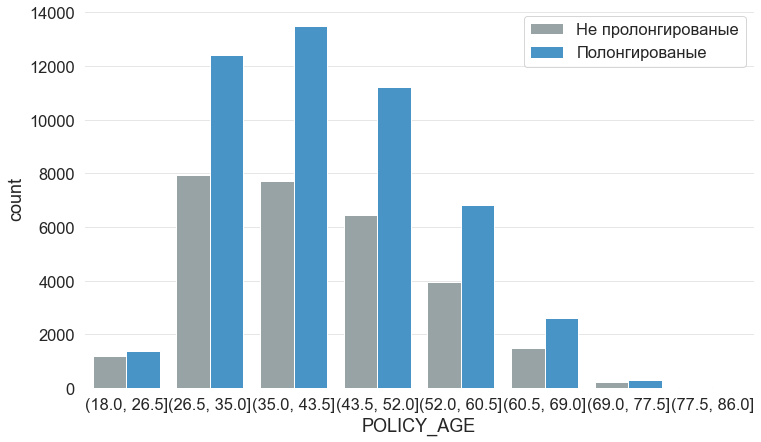

In [30]:
data_train['POLICY_AGE'] = pd.cut(data_train.POLICY_MIN_AGE, [18, 26.5, 35, 43.5, 52, 60.5, 69, 77.5, 86])
sns.countplot(x = "POLICY_AGE", hue = "POLICY_IS_RENEWED", data = data_train, palette=["C1", "C0"]).legend(labels = ["Не пролонгированые", "Полонгированые"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POLICY_MIN_AGE', ylabel='Density'>

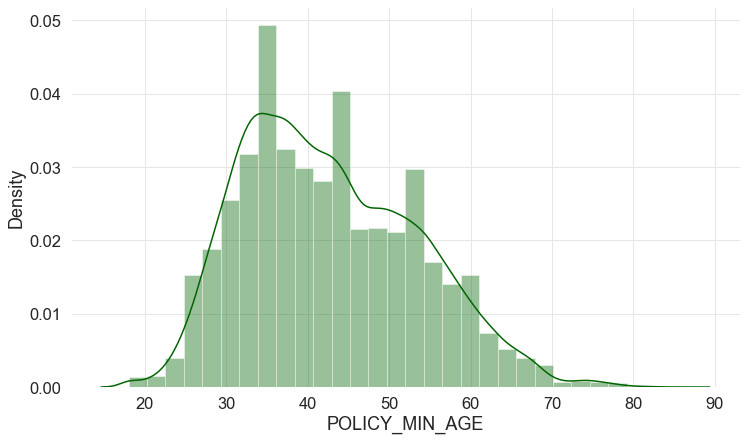

In [31]:
sns.distplot(data_train['POLICY_MIN_AGE'].dropna(),color='darkgreen',bins=30)

<ipython-input-32-b2bd5e5316f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['POLICY_SALES_CHANNEL'] = pd.cut(data_train.POLICY_SALES_CHANNEL_GROUP, [1, 2, 3, 4, 5, 6, 7, 8])


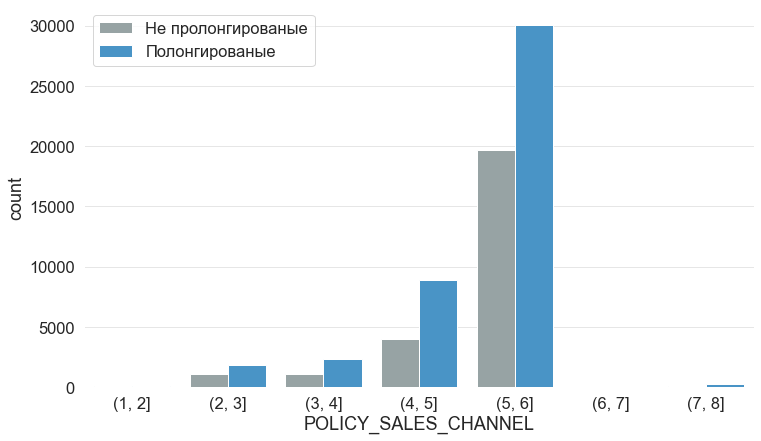

In [32]:
data_train['POLICY_SALES_CHANNEL'] = pd.cut(data_train.POLICY_SALES_CHANNEL_GROUP, [1, 2, 3, 4, 5, 6, 7, 8])
sns.countplot(x = "POLICY_SALES_CHANNEL", hue = "POLICY_IS_RENEWED", data = data_train, palette=["C1", "C0"]).legend(labels = ["Не пролонгированые", "Полонгированые"])

Text(0.5, 1.0, 'График')

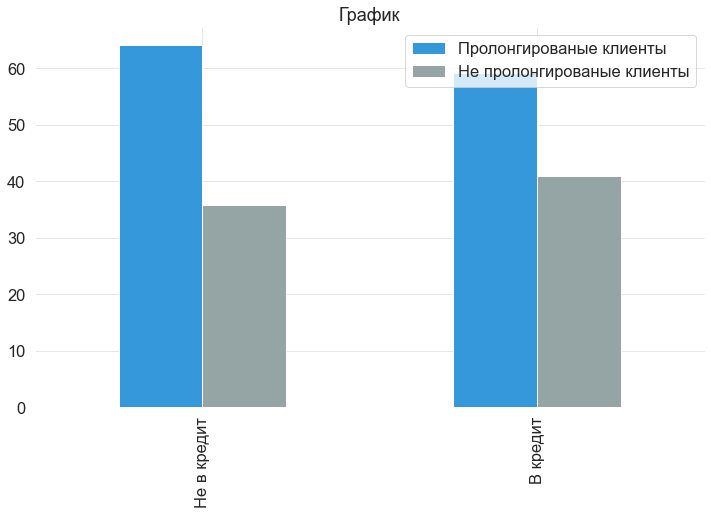

In [33]:
pclass_1 = round((data_train[data_train.VEHICLE_IN_CREDIT == 0].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.VEHICLE_IN_CREDIT == 0]) * 100, 2)
pclass_2 = round((data_train[data_train.VEHICLE_IN_CREDIT == 1].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.VEHICLE_IN_CREDIT == 1]) * 100, 2)

pclass_perc_df = pd.DataFrame(
    { "Пролонгированые клиенты":{"Не в кредит": pclass_1 ,"В кредит": pclass_2},  
     "Не пролонгированые клиенты":{"Не в кредит": 100-pclass_1 ,"В кредит": 100-pclass_2}})
pclass_perc_df.plot.bar().set_title("График")

<AxesSubplot:>

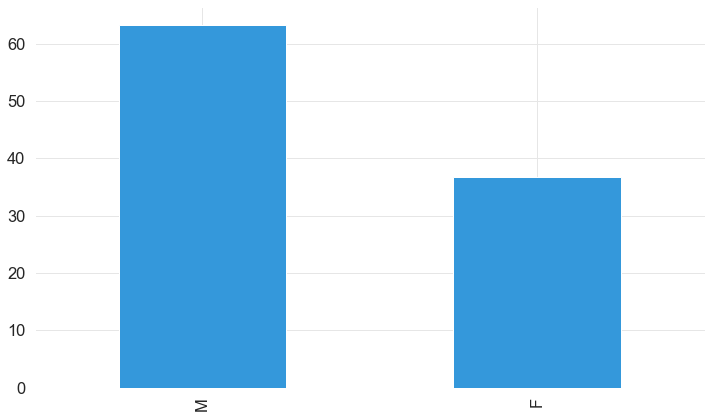

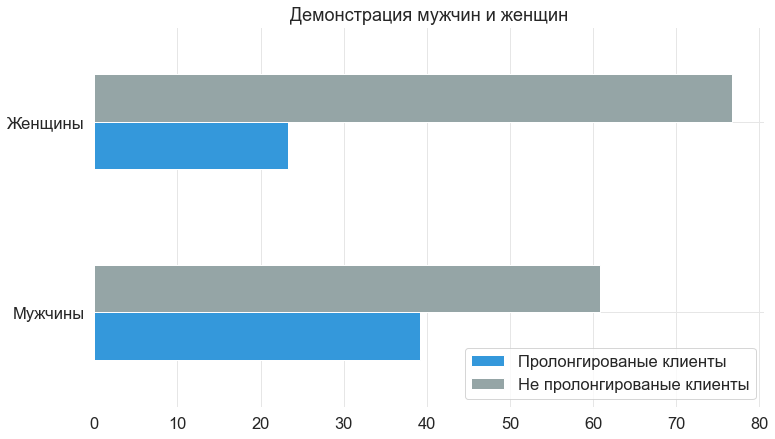

In [34]:
fig_sex = (data_train.INSURER_GENDER.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((data_train[data_train.INSURER_GENDER == 'M'].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train.INSURER_GENDER) * 100, 2)
female_pr = round((data_train[data_train.INSURER_GENDER == 'F'].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train.INSURER_GENDER) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Пролонгированые клиенты":{"Мужчины": male_pr,"Женщины": female_pr},  "Не пролонгированые клиенты":{"Мужчины": 100-male_pr,"Женщины": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Демонстрация мужчин и женщин")
fig_sex

Text(0.5, 1.0, 'График')

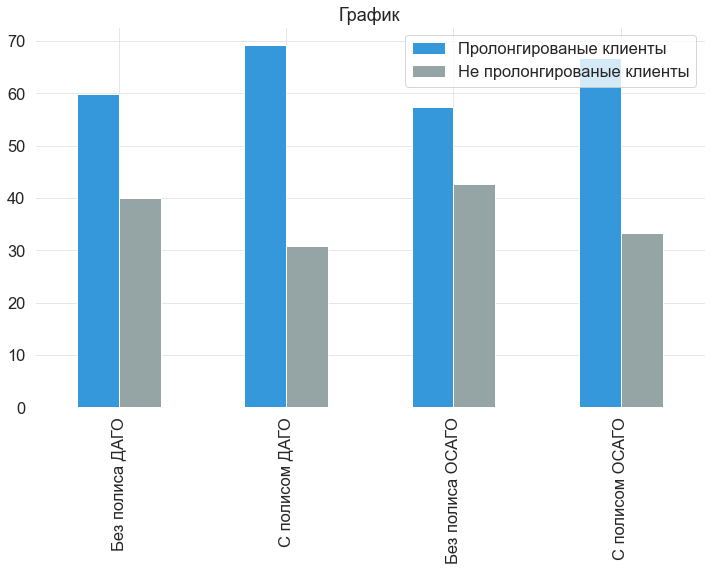

In [35]:
pclass_1 = round((data_train[data_train.CLIENT_HAS_DAGO == 0].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.CLIENT_HAS_DAGO == 0]) * 100, 2)
pclass_2 = round((data_train[data_train.CLIENT_HAS_DAGO == 1].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.CLIENT_HAS_DAGO == 1]) * 100, 2)
pclass_3 = round((data_train[data_train.CLIENT_HAS_OSAGO == 0].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.CLIENT_HAS_OSAGO == 0]) * 100, 2)
pclass_4 = round((data_train[data_train.CLIENT_HAS_OSAGO == 1].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.CLIENT_HAS_OSAGO == 1]) * 100, 2)

pclass_perc_df = pd.DataFrame(
    { "Пролонгированые клиенты":{"Без полиса ДАГО": pclass_1,"С полисом ДАГО": pclass_2,"Без полиса ОСАГО": pclass_3,"С полисом ОСАГО": pclass_4},  
     "Не пролонгированые клиенты":{"Без полиса ДАГО": 100-pclass_1,"С полисом ДАГО": 100-pclass_2,"Без полиса ОСАГО": 100-pclass_3,"С полисом ОСАГО": 100-pclass_4}})
pclass_perc_df.plot.bar().set_title("График")

Text(0.5, 1.0, 'График')

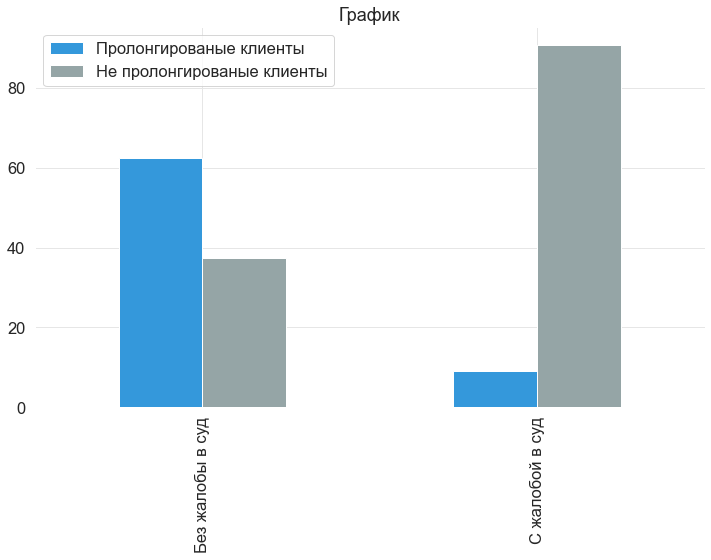

In [36]:
pclass_1 = round((data_train[data_train.POLICY_COURT_SIGN == 0].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.POLICY_COURT_SIGN == 0]) * 100, 2)
pclass_2 = round((data_train[data_train.POLICY_COURT_SIGN == 1].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.POLICY_COURT_SIGN == 1]) * 100, 2)

pclass_perc_df = pd.DataFrame(
    { "Пролонгированые клиенты":{"Без жалобы в суд": pclass_1,"С жалобой в суд": pclass_2},  
     "Не пролонгированые клиенты":{"Без жалобы в суд": 100-pclass_1,"С жалобой в суд": 100-pclass_2}})
pclass_perc_df.plot.bar().set_title("График")

Text(0.5, 1.0, 'График')

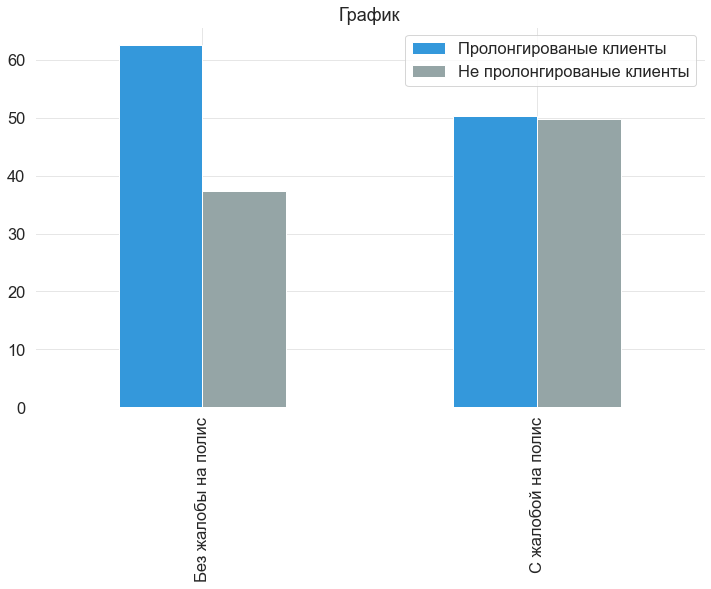

In [37]:
pclass_1 = round((data_train[data_train.POLICY_HAS_COMPLAINTS == 0].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.POLICY_HAS_COMPLAINTS == 0]) * 100, 2)
pclass_2 = round((data_train[data_train.POLICY_HAS_COMPLAINTS == 1].POLICY_IS_RENEWED == 1).value_counts()[1]/len(data_train[data_train.POLICY_HAS_COMPLAINTS == 1]) * 100, 2)

pclass_perc_df = pd.DataFrame(
    { "Пролонгированые клиенты":{"Без жалобы на полис": pclass_1,"С жалобой на полис": pclass_2},  
     "Не пролонгированые клиенты":{"Без жалобы на полис": 100-pclass_1,"С жалобой на полис": 100-pclass_2}})
pclass_perc_df.plot.bar().set_title("График")

# Отбрасываем лишние столбцы для ускорения модели и заменяем тип object на тип int

In [38]:
data_train.drop(['DATA_TYPE','POLICY_BEGIN_MONTH', 'POLICY_END_MONTH','POLICY_SALES_CHANNEL','POLICY_BRANCH', 'VEHICLE_MAKE', 'VEHICLE_MODEL' , 'POLICY_CLM_N','VEHICLE_ENGINE_POWER', 'VEHICLE_IN_CREDIT' , 'POLICY_INTERMEDIARY', 'POLICY_PRV_CLM_N','POLICY_PRV_CLM_GLT_N', 'CLAIM_AVG_ACC_ST_PRD','POLICY_YEARS_RENEWED_N', 'CLIENT_REGISTRATION_REGION', 'POLICY_CLM_GLT_N','POLICY_DEDUCT_VALUE', 'POLICY_AGE'], axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
data_test.drop(['DATA_TYPE','POLICY_BEGIN_MONTH', 'POLICY_END_MONTH','POLICY_BRANCH', 'VEHICLE_MAKE', 'VEHICLE_MODEL', 'POLICY_CLM_N','POLICY_SALES_CHANNEL', 'VEHICLE_ENGINE_POWER', 'VEHICLE_IN_CREDIT','POLICY_INTERMEDIARY', 'POLICY_CLM_GLT_N','POLICY_CLM_GLT_N','POLICY_PRV_CLM_N','CLAIM_AVG_ACC_ST_PRD','POLICY_PRV_CLM_GLT_N', 'POLICY_YEARS_RENEWED_N', 'CLIENT_REGISTRATION_REGION','POLICY_CLM_GLT_N','POLICY_DEDUCT_VALUE'], axis=1, inplace=True)

In [40]:
data_test['INSURER_GENDER'] = LabelEncoder().fit_transform(data_test['INSURER_GENDER'])

<ipython-input-40-9b4c6da90776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['INSURER_GENDER'] = LabelEncoder().fit_transform(data_test['INSURER_GENDER'])


In [41]:
data_train['INSURER_GENDER'] = LabelEncoder().fit_transform(data_train['INSURER_GENDER'])

<ipython-input-41-f04803530601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['INSURER_GENDER'] = LabelEncoder().fit_transform(data_train['INSURER_GENDER'])


In [42]:
data_train = data_train.dropna()
feature_train = data_train['POLICY_IS_RENEWED']
label_train  = data_train.drop(['POLICY_IS_RENEWED'], axis = 1)
data_train.shape #891 x 28

(77407, 12)

# Обучаем модель алгоритмом случайного леса

In [62]:
##Random forest
clf = RandomForestClassifier( 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

RF Accuracy: 66.65%


# Проверяем её при помощи метрики ROC AUC

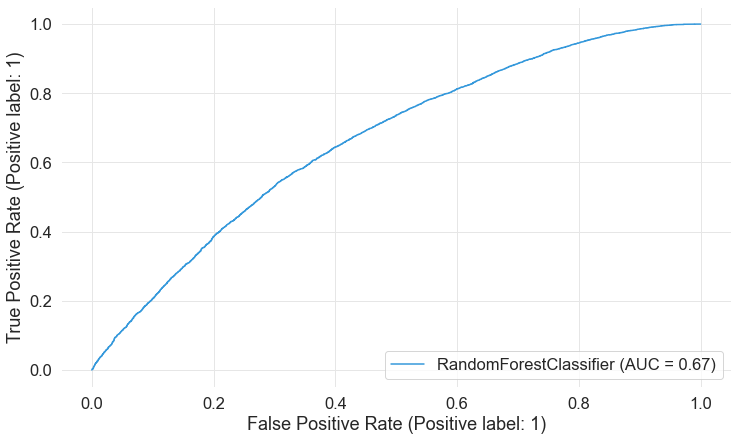

In [44]:
metrics.plot_roc_curve(clf, x_test, y_test)  
plt.show() 

# Код для прогнозирования Тестовой части и сохранения её в CVS файл

In [45]:
# Data to be predicted

X_to_be_predicted = data_test.drop(['POLICY_IS_RENEWED'], axis = 1)

In [ ]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'POLICY_ID':X_to_be_predicted.POLICY_ID,'POLICY_IS_RENEWED':result})
submission.POLICY_IS_RENEWED = submission.POLICY_IS_RENEWED.astype(int)
print(submission.shape)
filename = 'POLICY_IS_RENEWED.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

In [ ]:
z = pd.read_csv('POLICY_IS_RENEWED.csv')

In [ ]:
z.POLICY_IS_RENEWED.value_counts()